In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
from keras.datasets import mnist

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [ ]:
train_X[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

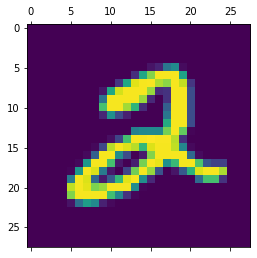

In [ ]:
plt.matshow(train_X[5])

In [ ]:
train_X=train_X/255
test_X= test_X/255

In [ ]:
train_y[5]

2

In [ ]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
train_y[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
train_X_flattens = train_X.reshape(len(train_X),28*28)

In [ ]:
train_X_flattens.shape

(60000, 784)

In [ ]:
test_X_flattens = test_X.reshape(len(test_X),28*28)

In [ ]:
test_X_flattens.shape

(10000, 784)

In [ ]:
print(train_X_flattens[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [ ]:
model = keras.Sequential ([keras.Input(shape=(784,)),
                          keras.layers.Dense(200,activation='relu'),
                          keras.layers.Dense(200,activation='tanh'),
                          keras.layers.Dense(200,activation='softmax'),
                          keras.layers.Dense(50,activation='sigmoid')])

model.compile (
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

)
model.fit(train_X_flattens,train_y, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.8656 - accuracy: 0.2729
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6137 - accuracy: 0.3165
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0709 - accuracy: 0.6221
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6955 - accuracy: 0.7787
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5090 - accuracy: 0.8778
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2510 - accuracy: 0.9760
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1594 - accuracy: 0.9817
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1161 - accuracy: 0.9851
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0949 - accuracy: 0.9858
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.072

In [ ]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_27 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_28 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_29 (Dense)             (None, 50)                10050     
Total params: 247,450
Trainable params: 247,450
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.evaluate(test_X_flattens,test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.1542 - accuracy: 0.9733


[0.15418674051761627, 0.9732999801635742]

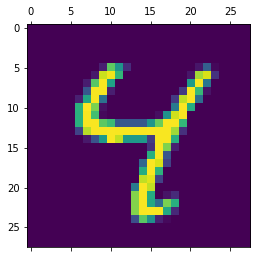

In [ ]:
plt.matshow(test_X[6])

In [ ]:
y_pre=model.predict(test_X_flattens)
print(y_pre[6])

[2.3481706e-02 4.4596086e-06 2.6194233e-02 1.2564182e-04 9.9996543e-01
 1.4995480e-02 3.2316038e-01 4.8121495e-07 9.9423379e-01 9.9452859e-01
 1.4676976e-06 1.4395871e-06 1.6177515e-06 1.8071569e-06 1.8650394e-06
 1.5135885e-06 1.9374079e-06 1.8381677e-06 1.4883897e-06 1.8119820e-06
 1.7415414e-06 1.6202234e-06 1.5258510e-06 1.6874735e-06 1.8084930e-06
 1.7016740e-06 1.7696212e-06 1.8182242e-06 1.5318858e-06 2.2326662e-06
 1.8557836e-06 1.8271849e-06 1.9640891e-06 1.6491003e-06 1.5466062e-06
 2.1240164e-06 1.4287057e-06 1.6287162e-06 1.7844260e-06 1.6043953e-06
 1.4837017e-06 1.6377502e-06 1.6165625e-06 1.6780023e-06 1.4607310e-06
 1.4543024e-06 1.9457125e-06 2.0798755e-06 1.7799406e-06 1.4652165e-06]


In [ ]:
np.argmax(y_pre[6])

4